<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MHA_P3_2s2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas A - P3 - 2s2024

## Enunciado

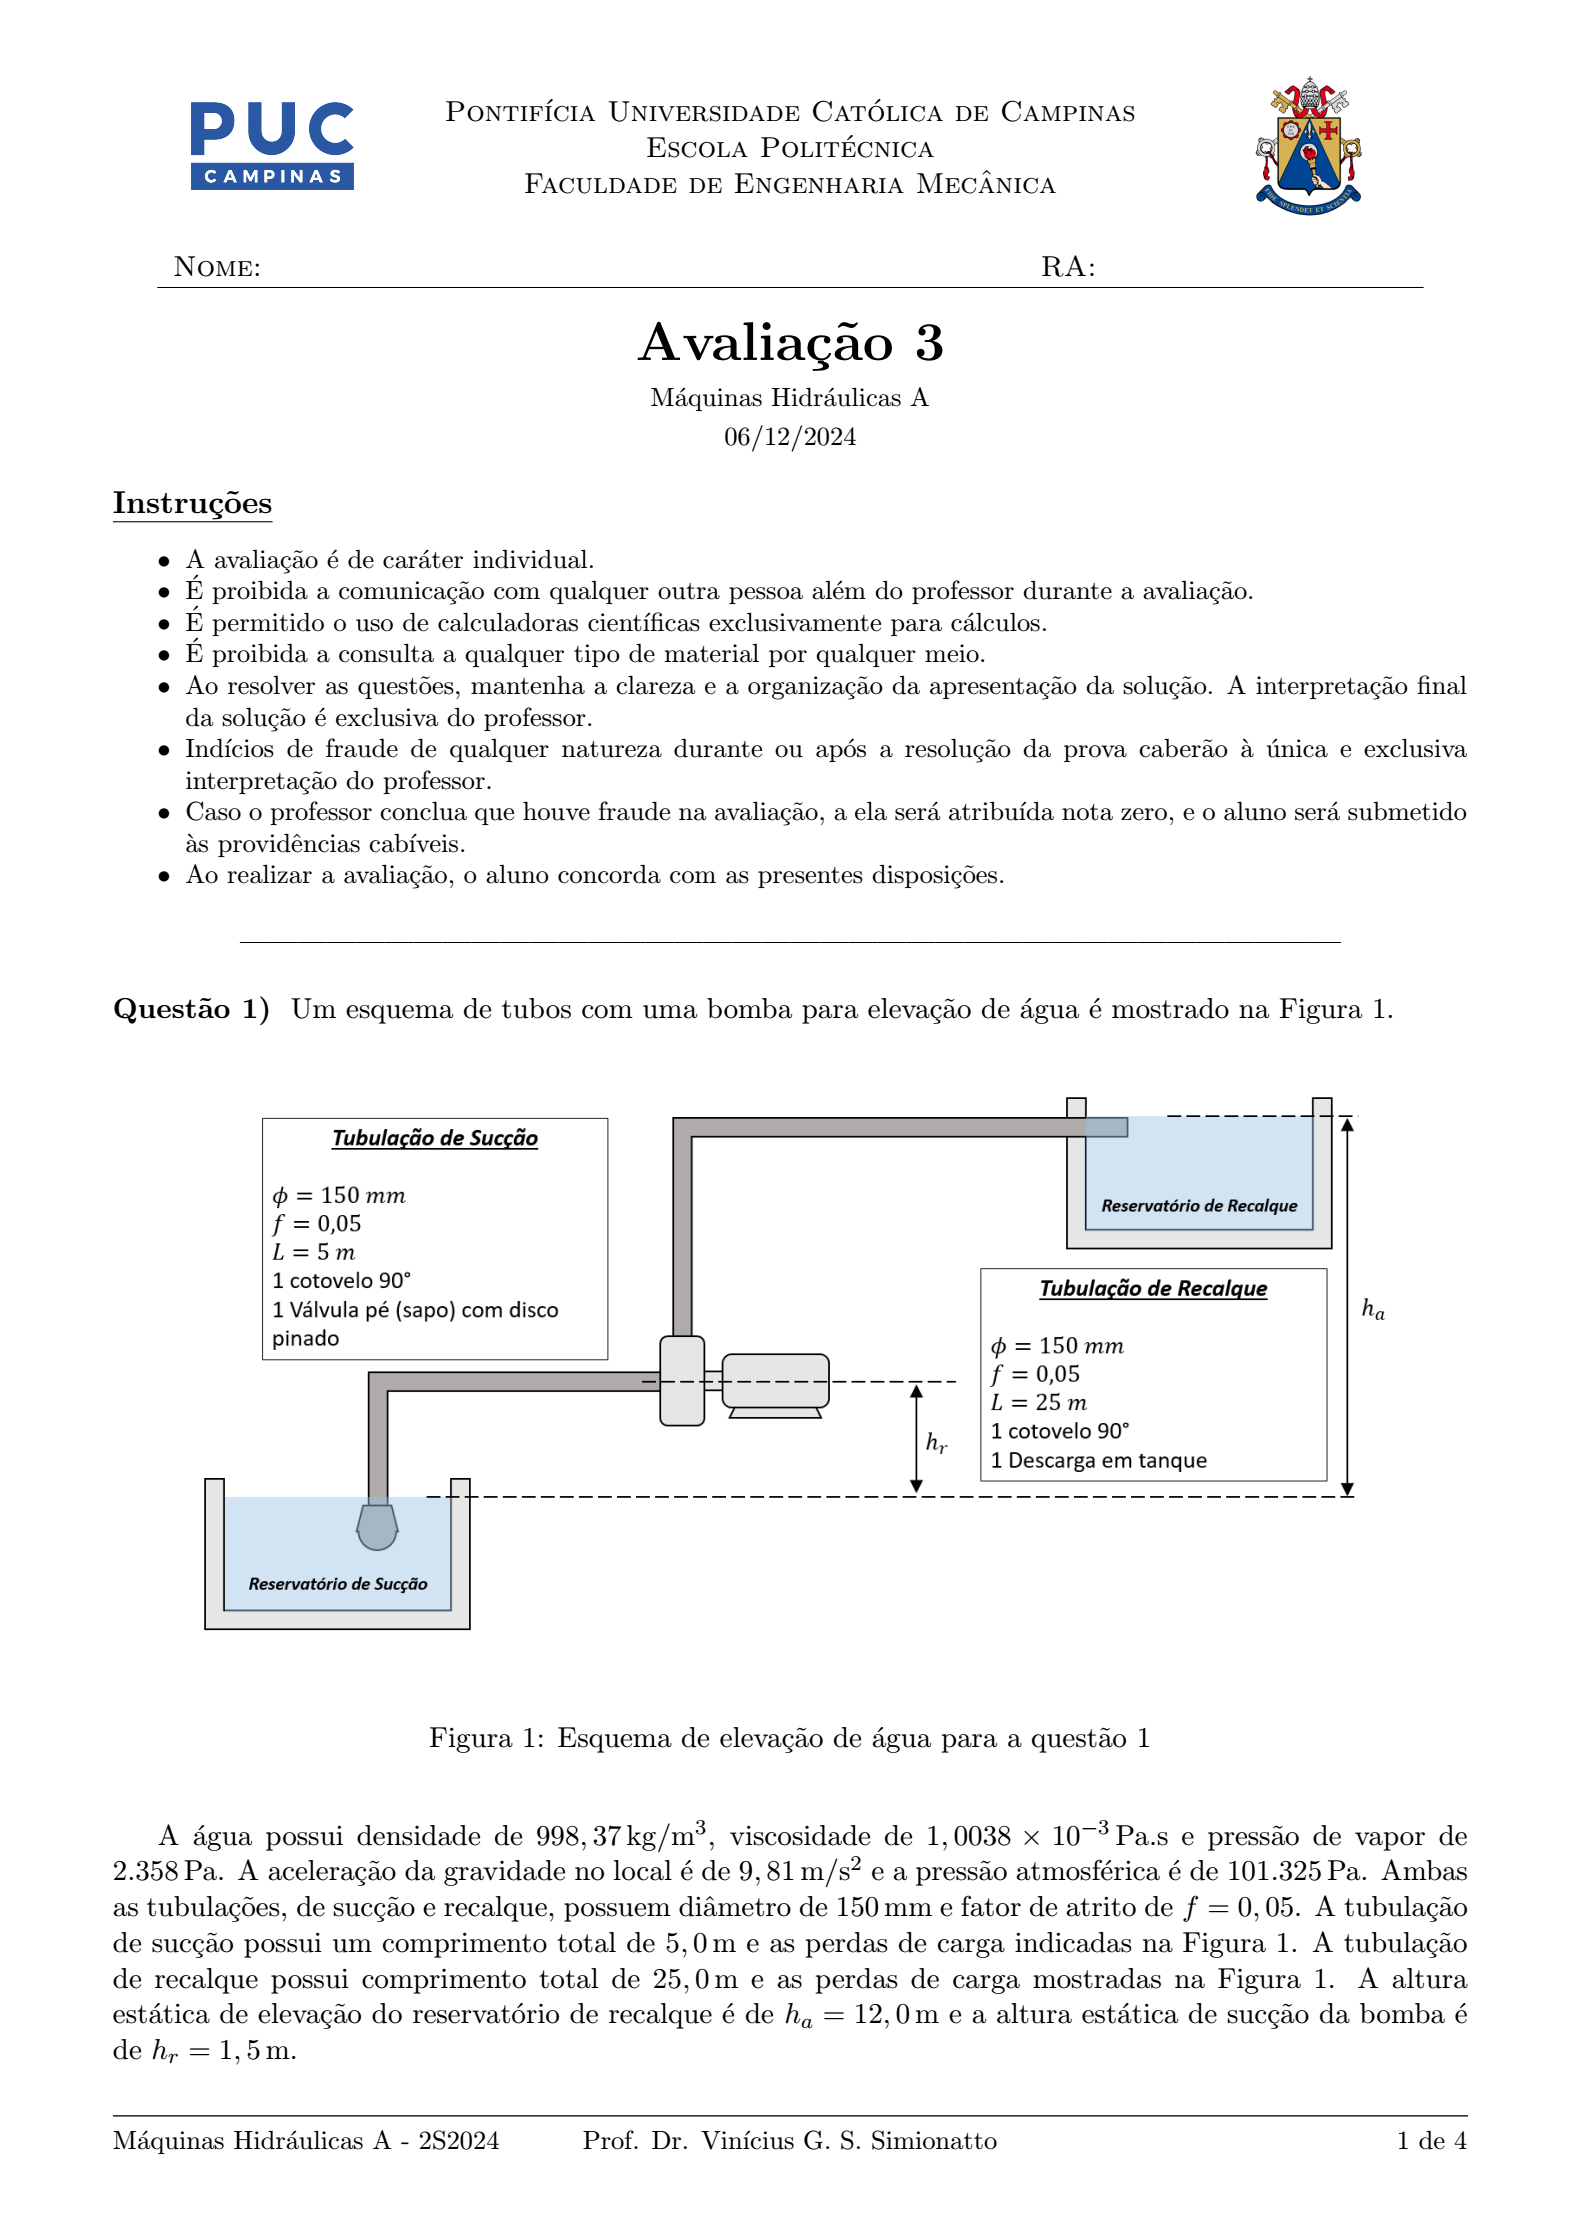

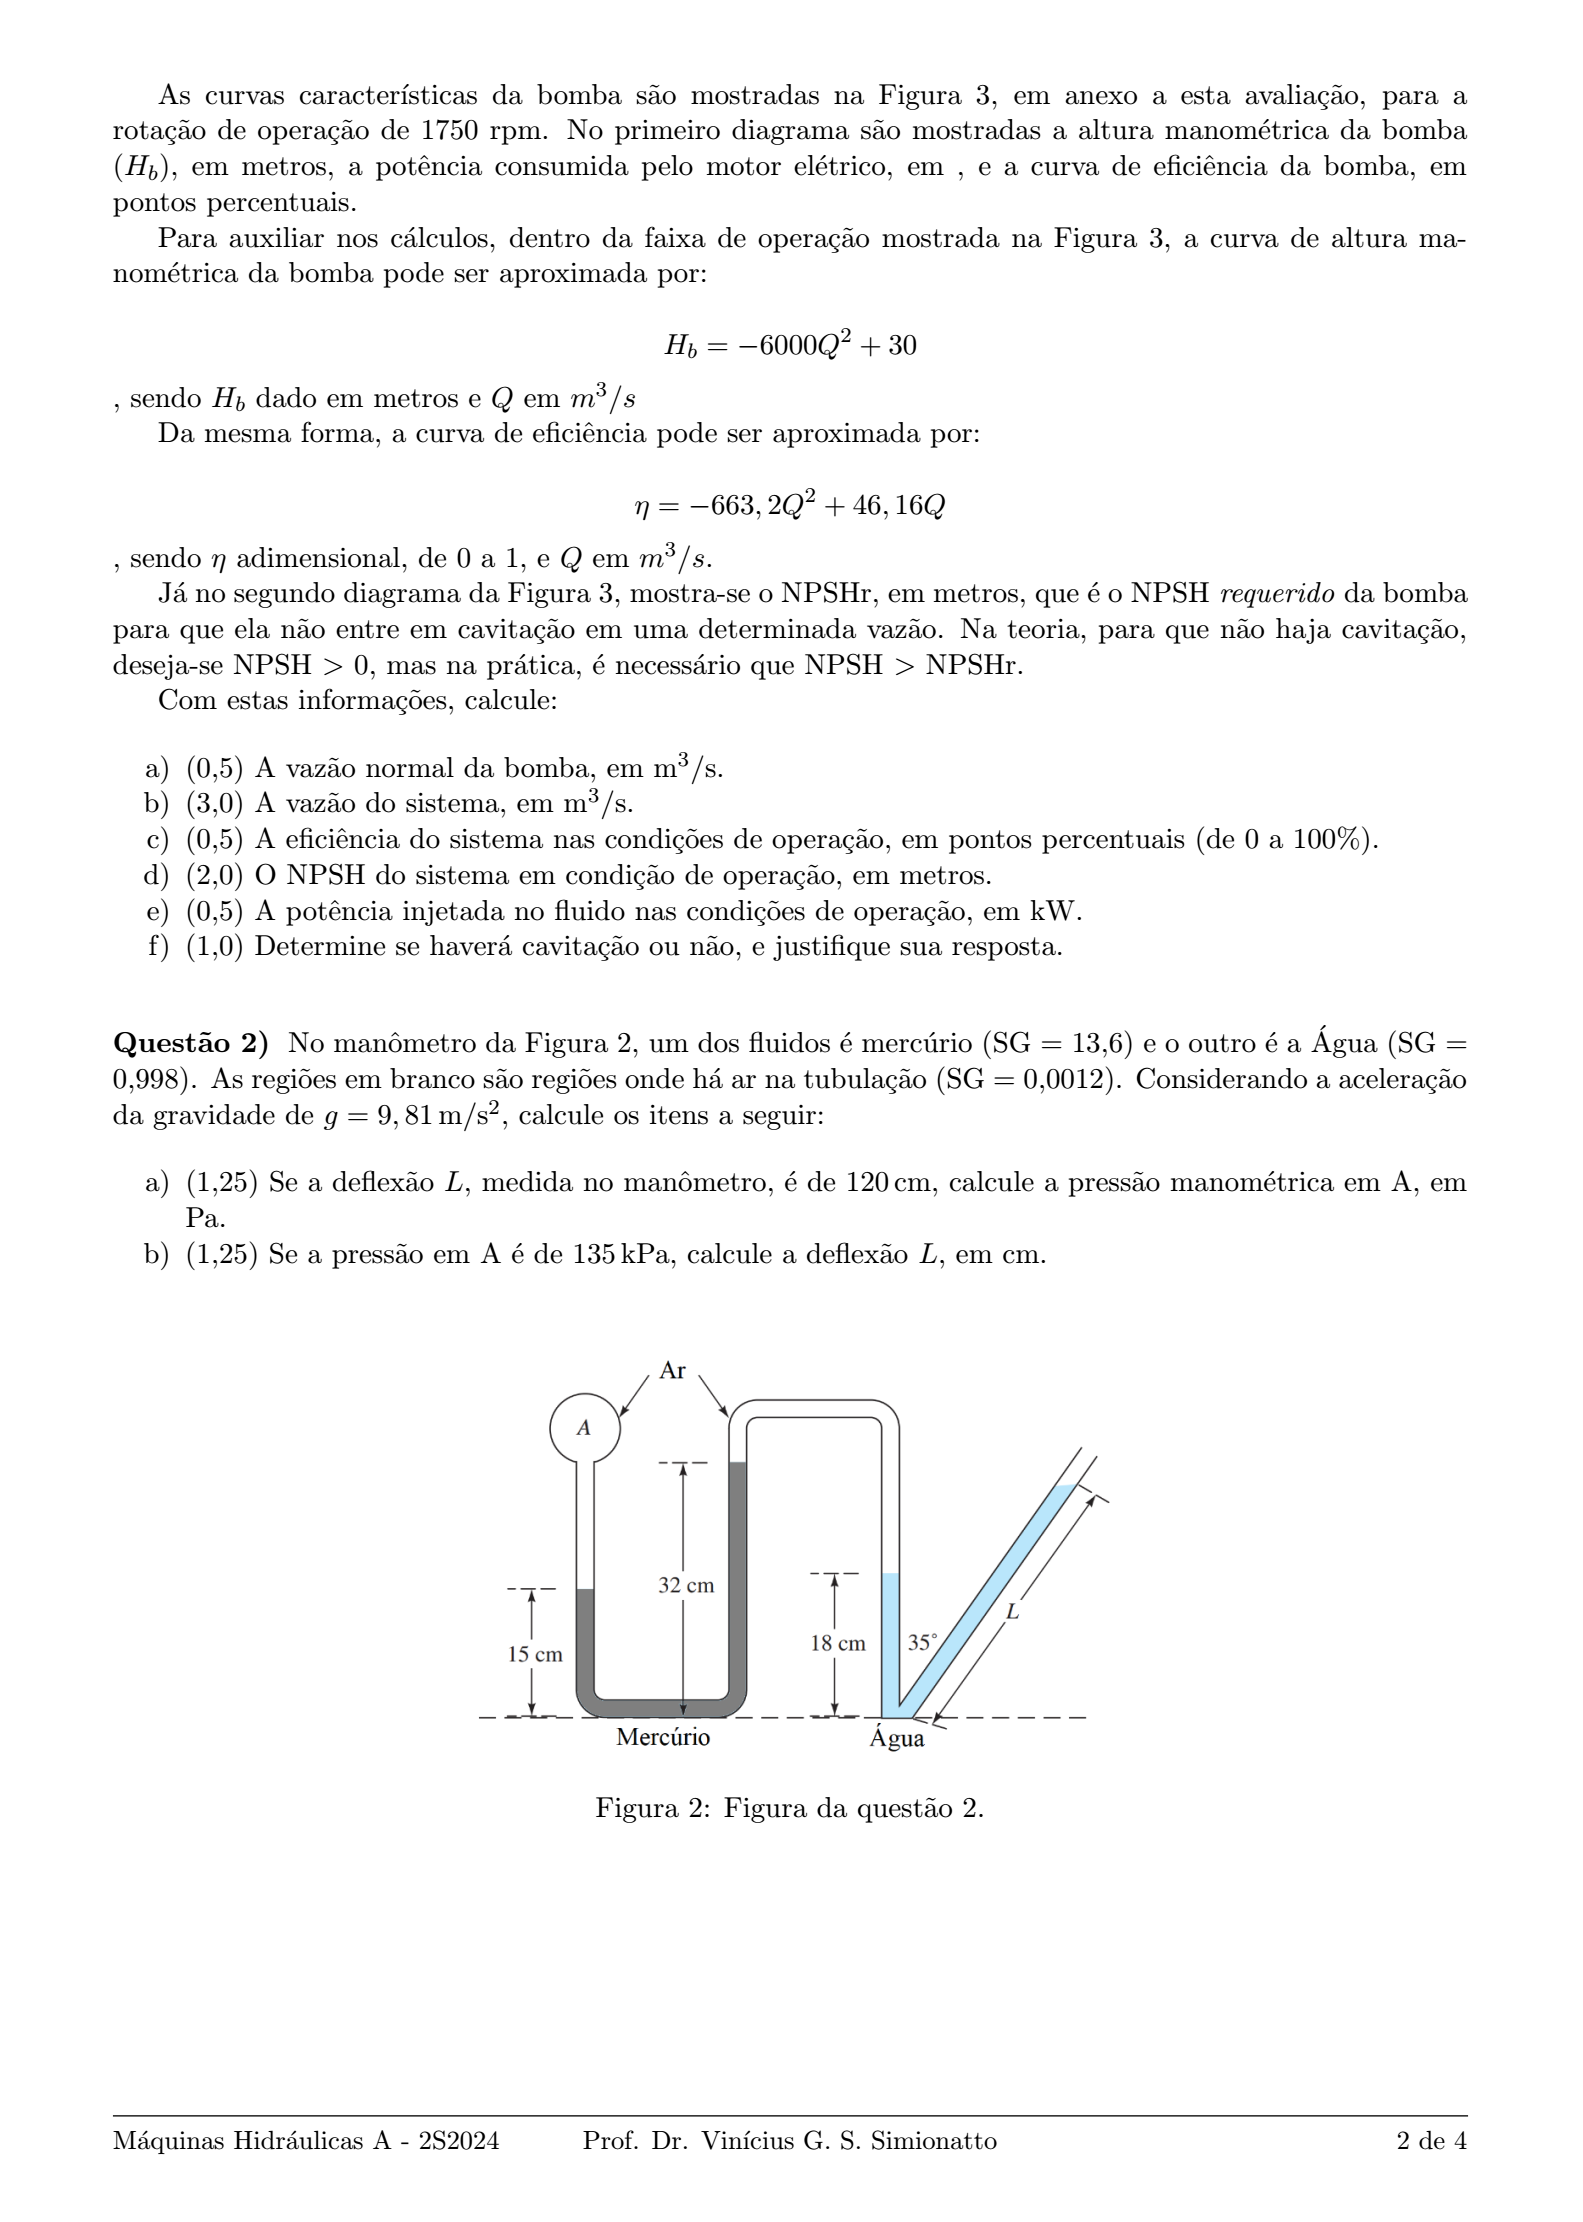

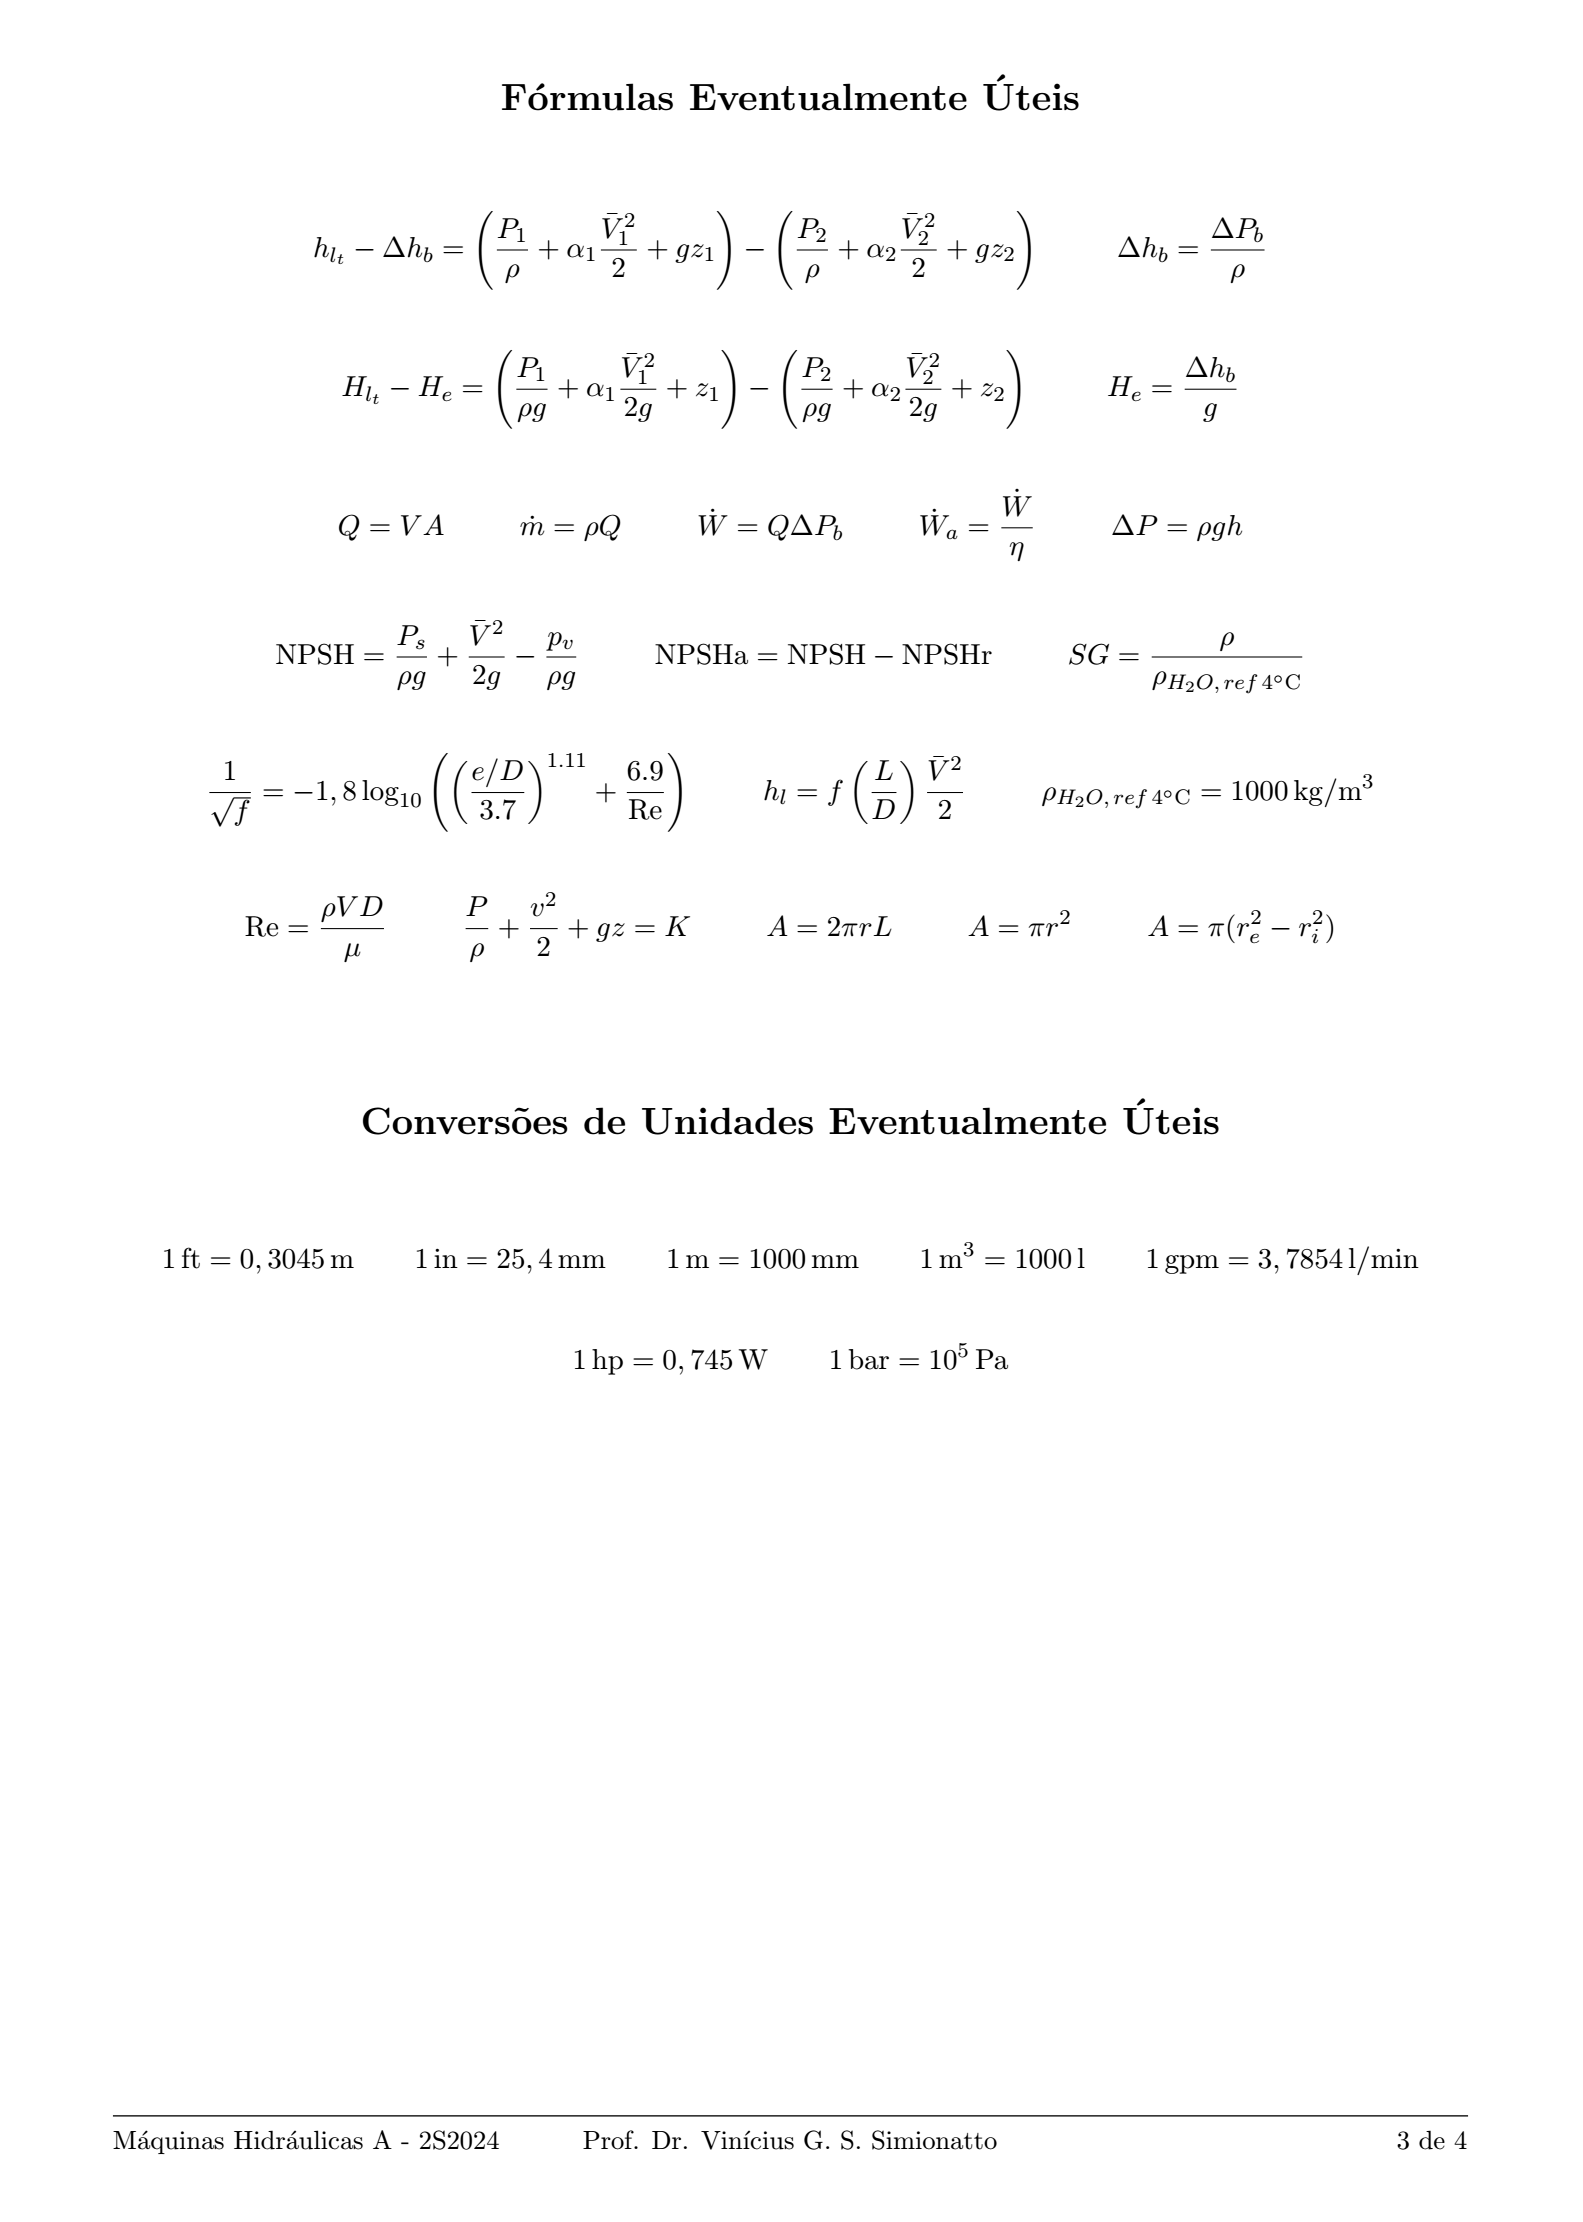

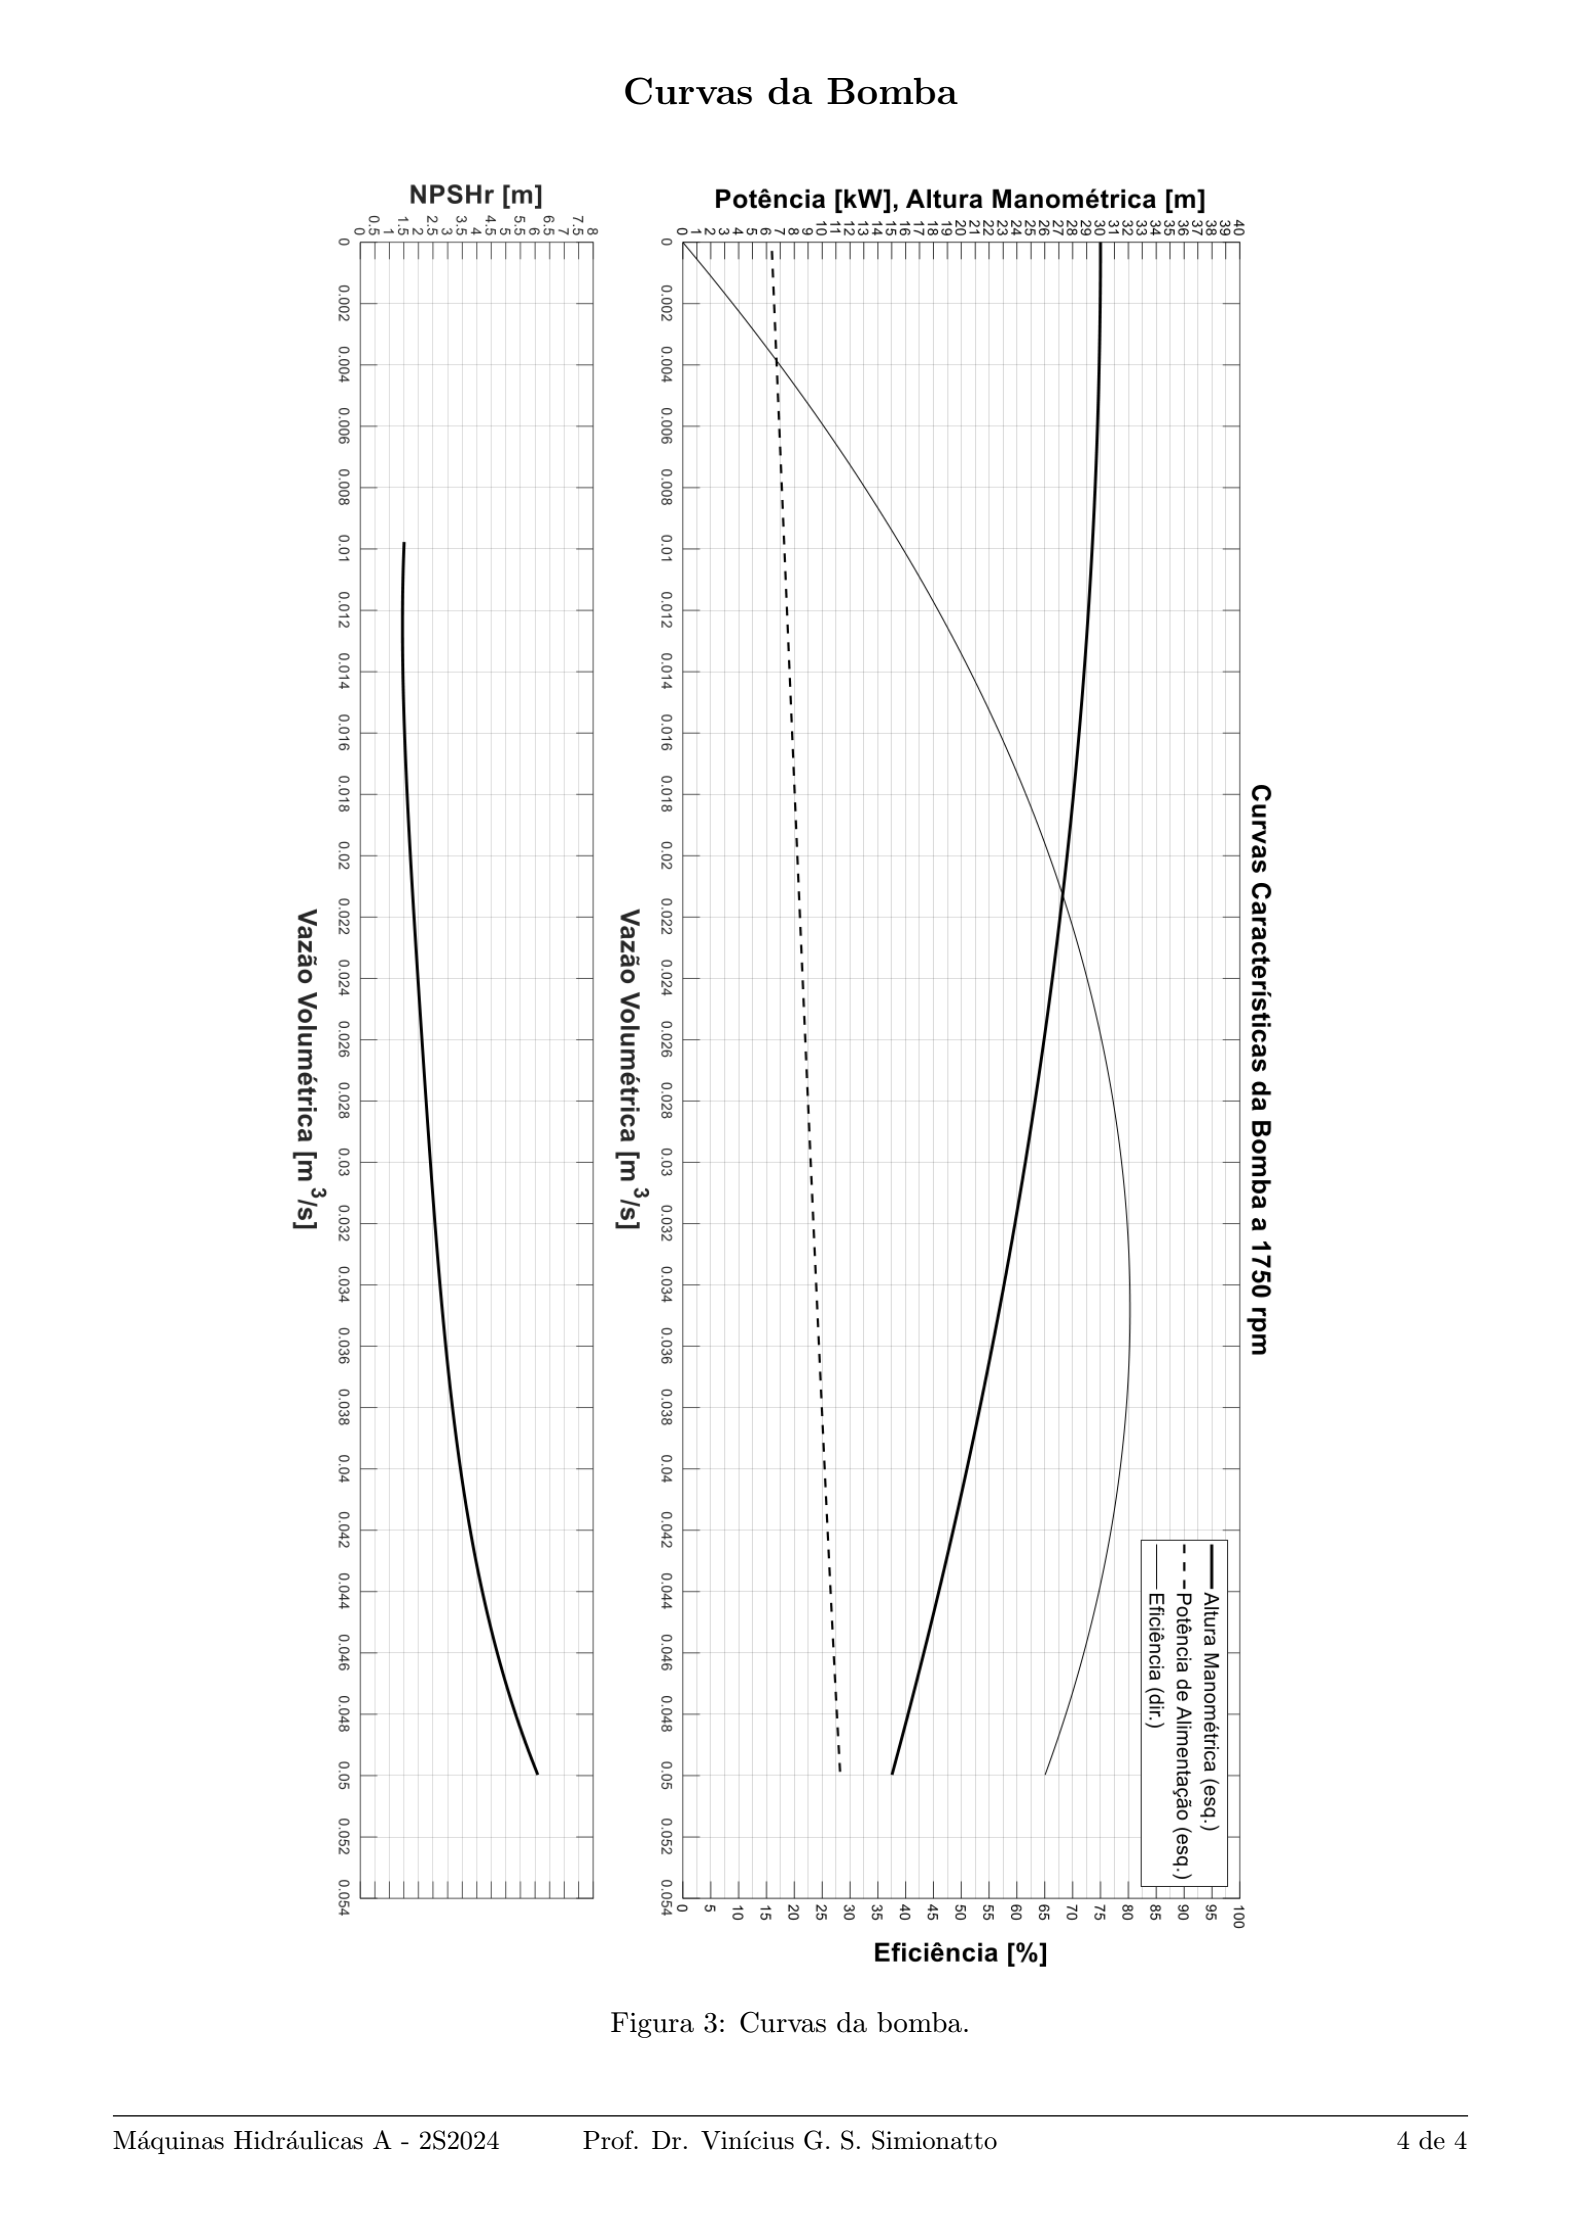

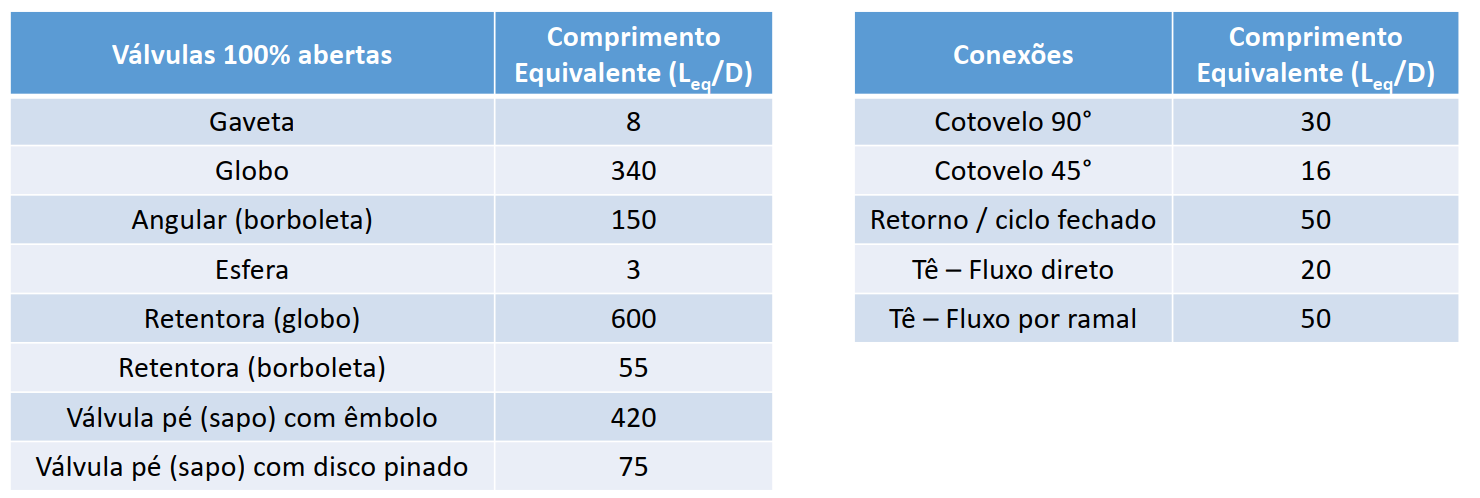

## Solução

### Questão 1 a)

A vazão normal da bomba é a vazão em que a eficiência é máxima. Para isso, pode-se analisar a curva da eficiência por vazão, dada por:

$$
\eta = -663,2 Q^2 + 46,16 Q
$$

Esta curva é uma parábola com concavidade negativa e com uma das raízes nula. O máximo desta curva é calculado através de:

$$
\frac{\partial \eta}{\partial Q} = 0 = -1326,4 Q + 46,16
$$

Assim:

$$
Q = \frac{46,16}{1326,4} = 0,0348\,\mathrm{m^3/s}
$$

In [ ]:
Qn = 46.16/1326.4

print(f'A vazão normal da bomba é de {Qn:.4f} m³/s')

A vazão normal da bomba é de 0.0348 m³/s


### Questão 1 b)

Para calcular a vazão do sistema é necessário utilizar a equação de Bernoulli para perda de carga, dada por:

$$
\left(\frac{p_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{p_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right) = H_{Lt} - H_b
$$

O ponto 1 é o nível do reservatório de sucção e o ponto 2 é o nível do reservatório de descarga ou recalque. Em ambos os pontos a velocidade é praticamente nula e a pressão é a atmosférica. Além disso, a diferença de elevação é $z_2-z_1 = h_a = 12\,\mathrm{m}$. Assim, o lado esquerdo da equação se simplifica para:

$$
-h_a = H_{Lt} - H_b
$$

Reorganizando:

$$
H_b = H_{Lt} + h_a
$$

O termo $H_{Lt}$ é a perda de carga da tubulação, e é dado por:

$$
H_{Lt} = H_{L,V.pe}+ 2H_{L,cot} + H_{L,tubo} + H_{L,desc}
$$

A perda de carga de cada elemento é dada por:

$$
H_{L,V.pe} = f\left(\frac{L_{eq}}{D}\right) \frac{\bar{V}^2}{2g} = f\left(\frac{L_{eq}}{D}\right) \frac{8Q^2}{2g \pi^2 D^4 } = 306,03\,Q^2
$$

$$
H_{L,cot} = f\left(\frac{L_{eq}}{D}\right) \frac{8Q^2}{2g \pi^2 D^4 } = 122,41\,Q^2
$$

$$
H_{L,tubo} = \frac{8fLQ^2}{2g \pi^2 D^5} = 816,07\,Q^2
$$

$$
H_{L,desc} = \frac{K_{desc} \bar{V}^2}{2g} = \frac{8 Q^2}{\pi^2D^4g} = 163,21\,Q^2
$$

Assim, a perda de carga em função da vazão é dada por:
$$
H_{Lt} = H_{L,V.pe} + 2 H_{L,cot} + H_{L,tubo} + H_{L,desc} = 1530,13 \,Q^2
$$

Substituindo tudo na equação da perda de carga:

$$
-6000 Q^2 + 30 = 1530,13 \,Q^2 + 12
$$

Assim, a vazão do sistema é dada por:

$$
Q = 0.0489\,\mathrm{m^3/s}
$$

In [ ]:
from numpy import pi, sqrt

Leq_D_Vpe = 75
Leq_D_cot = 30
Kdesc = 1

Ls = 5   # m
Ld = 25  # m
L = Ls + Ld
ha = 12  # m

D = 0.15  # m
f = 0.05
g = 9.81  # m/s²

HL_Vpe_Q = f*Leq_D_Vpe*8/(2*(pi**2)*g*(D**4))

print(f'HL,V.pe = {HL_Vpe_Q:.2f} Q²')

HL_cot_Q = f*Leq_D_cot*8/(2*(pi**2)*g*(D**4))

print(f'HL,cot = {HL_cot_Q:.2f} Q²')

HL_tubo_Q = 8*f*L/(2*(pi**2)*g*(D**5))

print(f'HL,tubo = {HL_tubo_Q:.2f} Q²')

HL_desc_Q = 8*Kdesc/((pi**2)*g*(D**4))

print(f'HL,desc = {HL_desc_Q:.2f} Q²')

Hb_Q = HL_Vpe_Q + 2*HL_cot_Q + HL_tubo_Q + HL_desc_Q

print(f'Hb = {Hb_Q:.2f} Q²')

Qop = sqrt((30-ha) / (Hb_Q + 6000))

print(f'A vazão de operação vale {Qop:.4f} m³/s')

HL,V.pe = 306.03 Q²
HL,cot = 122.41 Q²
HL,tubo = 816.07 Q²
HL,desc = 163.21 Q²
Hb = 1530.13 Q²
A vazão de operação vale 0.0489 m³/s


### Questão 1 c)

Basta substituir a vazão encontrada na fórmula da eficiência:

$$
\eta = -663,2 Q^2 + 46,16 Q = 67,15\,\%
$$

In [ ]:
eta_op = -663.2*Qop**2 + 46.16*Qop

print(f'A eficiência do sistema é de {100*eta_op:.2f} %')

A eficiência do sistema é de 67.15 %


### Questão 1 d)

Para calcular o NPSH da tubulação é necessário que o ponto 2 da análise fique na sucção da bomba. Com esta alteração, é necessário reaplicar a equação de Bernoulli para perda de carga.

Uma vez que se altera a posição do ponto 2 para a sucção, passaremos a chamar este ponto de ponto 's'. Desta forma, temos:

$$
\left(\frac{p_1}{\rho g} + \alpha_1\frac{\bar{V}_1^2}{2g}+ z_1\right) - \left(\frac{p_s}{\rho g} + \alpha_s\frac{\bar{V}_s^2}{2g}+ z_s\right) = H_{Ls}
$$

Do lado direito desta equação, sabe-se que:
- $p_1 = P_{atm}$
- $\bar{V}_1 = 0$
- $z_s - z_1 = h_r$
- $\bar{V}_s = Q/A = 2,77\,\mathrm{m/s}$
- $\alpha_s \approx 1$ (hipótese de fluxo turbulento)

Assim a equação fica:

$$
\frac{P_{atm}-P_s}{\rho g} - \frac{\bar{V}_s^2}{2g} - h_r = H_{Ls}
$$

A fórmula do NPSH é:

$$
\mathrm{NPSH} = \frac{P_s}{\rho g} + \frac{\bar{V}_s^2}{2g} - \frac{p_v}{\rho g}
$$

Pode-se manipular a equação acima para obter:

$$
\frac{P_{atm}}{\rho g} - h_r - \underbrace{\left(\frac{P_s}{\rho g} + \frac{\bar{V}_s^2}{2g}-\frac{p_v}{\rho g}\right)}_{\mathrm{NPSH}} = H_{Ls} + \frac{p_v}{\rho g}
$$

Portanto, isolando o NPSH:

$$
\mathrm{NPSH} = \frac{P_{atm}-p_v}{\rho g} - h_r - H_{Ls}
$$

O termo $H_{Ls}$ é composto pela perda de carga da válvula pé, de um cotovelo de $90^\circ$ e de $5\,\mathrm{m}$ de tubulação. Assim:

$$
\mathrm{NPSH} = 5.91\,\mathrm{m}
$$

In [ ]:
A = pi*D**2/4
Vs = Qop/A

print(f'Vs = {Vs:.2f} m/s')

Patm = 101325  # Pa
pv = 2358      # Pa
rho = 998.37   # kg/m³
hr = 1.5       # m

HLs = f*(Leq_D_Vpe + Leq_D_cot + Ls/D)*Vs**2/(2*g)

print(f'HLs = {HLs:.2f} m')

NPSH = (Patm-pv)/(rho*g) - hr - HLs

print(f'O NPSH da tubulação é de {NPSH:.2f} m')


Vs = 2.77 m/s
HLs = 2.70 m
O NPSH da tubulação é de 5.91 m


### Questão 1 e)

A potência injetada no fluido é dada por:

$$
\dot{W}_b = \rho Q g H_b = 7497,58\,\mathrm{W} = 7,50\,\mathrm{kW}
$$

In [ ]:
Wb = rho*Qop*g*(-6000*Qop**2+30)

print(f'A potência injetada no fluido é de {Wb:.2f} W ou {Wb/1000:.2f} kW')

A potência injetada no fluido é de 7497.58 W ou 7.50 kW


### Questão 1 f)

Pela leitura do gráfico, o NPSH requerido para esta condição é o de $5,75\,\mathrm{m}$ e o calculado é de $5,91\,\mathrm{m}$. Assim, não haverá a cavitação, mas a bomba já opera em uma região muito próxima, sendo que o NPSH disponível é de apenas $0,16\,\mathrm{m}$.

### Questão 2 a)

Se a deflexão $L$ é de $1,2 \,\mathrm{m}$, então a altura correspondente à deflexão é de:

$$
h = L\cos30^\circ = 0,983\,\mathrm{m}
$$

A pressão na fronteira entre a água e o ar interno à tubulação é dada por:

$$
P_1 = P_{atm} + \rho_{a} g (h-0,18\,\mathrm{m}) = P_{atm} + 7.861,5\,\mathrm{Pa}
$$

Como ar está preso dentro da tubulação, esta será aproximadamente a mesma pressão na interface entre o ar e o mercúrio interno ao manômetro. Na potra interface do mercúrio, a pressão é de:

$$
P_2 = P_1 + \rho_mg(0,17\,\mathrm{m}) = P_{atm} + 30.524,22\,\mathrm{Pa}
$$

Como o fluido na tubulação $A$ é ar, esta é a propria pressão absoluta na tubulação. A pressão manométrica é calculada descontando a pressão atmosférica da absoluta. Assim:

$$
P_2^{(mano)} = 30.542,22\,\mathrm{Pa}
$$

In [3]:
%reset -f

from numpy import cos, pi

L = 1.2  # m

h = L*cos(35*pi/180)

print(f'A altura correspondente à deflexão é de {h:.4f} m')

rho_a = 998  # kg/m³
g = 9.81     # m/s²

P1m = rho_a*g*(h-0.18)

print(f'A pressão na fronteira entre a água e o ar interno à tubulação é de Patm + {P1m:.2f} Pa')

rho_m = 13600  # kg/m³

P2m = P1m + rho_m*g*0.17

print(f'A pressão na outra interface do mercúrio é de Patm + {P2m:.2f} Pa')

A altura correspondente à deflexão é de 0.9830 m
A pressão na fronteira entre a água e o ar interno à tubulação é de Patm + 7861.50 Pa
A pressão na outra interface do mercúrio é de Patm + 30542.22 Pa


### Questão 2 b)

Se a pressão em $A$ é de $135\,\mathrm{kPa}$, usando as relações do exercício anterior, podemos obter:

$$
P_{atm} = P_1 - \rho_a g (h - 0,18\,\mathrm{m})
$$

$$
P_1 = P_2 - \rho_m g (0,17\,\mathrm{m})
$$

Assim:

$$
P_{atm} = P_2 - \rho_m g (0,17\,\mathrm{m}) - \rho_a g (h - 0,18\,\mathrm{m})
$$

Reorganizando:

$$
h = \frac{P_2 - P_{atm} - \rho_m g (0,17\,\mathrm{m}) + \rho_a g (0,18\,\mathrm{m})}{\rho_a g}
$$

Aproximando $P_{atm}$ por $101.325\,\mathrm{Pa}$:

$$
h = 1,303\,\mathrm{m}
$$

Então, a deflexão é dada por:
$$
L = \frac{h}{\cos 35^\circ} = 1,5906\,\mathrm{m}
$$


In [5]:
P2b = 135000   # Pa
Patm = 101325  # Pa

h = (P2b - Patm - rho_m*g*0.17 + rho_a*g*0.18)/(rho_a*g)

print(f'A altura correspondente à pressão de 135 kPa é de {h:.4f} m')

L = h/cos(35*pi/180)

print(f'A deflexão é de {L:.4f} m')


A altura correspondente à pressão de 135 kPa é de 1.3030 m
A deflexão é de 1.5906 m
